In [1]:
import thesis_utils as tu
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = tu.Dataset()
td_df = data.translated_data
sd_df = data.site_data

m_df = pd.merge(td_df[['site_data_id', 'original_language']], sd_df[['id', 'category','origin']], left_on='site_data_id', right_on='id')

original = m_df[m_df['origin']=='original']
additional = m_df[m_df['origin']=='additional']

/Users/mitchellborchers/.virtualenvs/thesis/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/Users/mitchellborchers/.virtualenvs/thesis/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


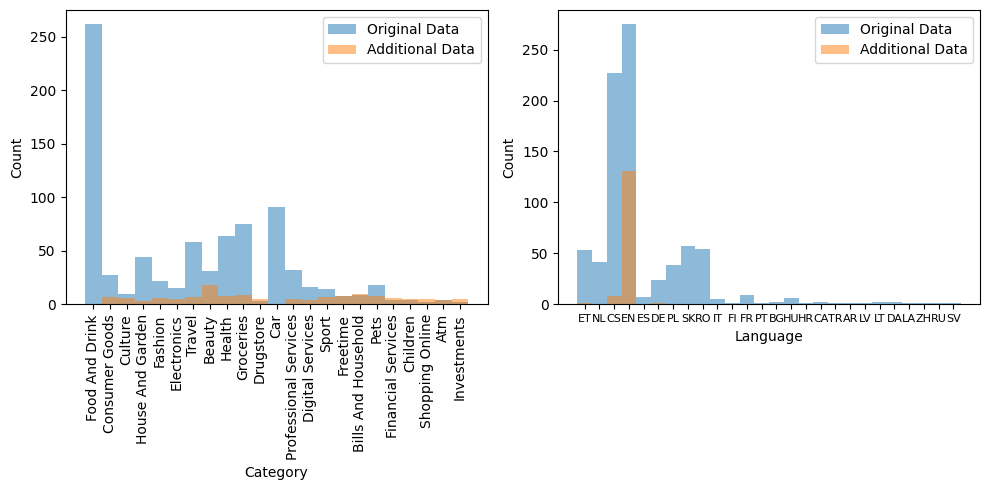

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# Get the unique categories from all three dataframes
categories = pd.concat([original['category'], additional['category'], sd_df['category']]).unique()
# Set the bin edges to be the unique categories
bins = np.arange(len(categories) + 1)

# fig, ax = plt.subplots()
ax[0].hist(original['category'], bins=bins, alpha=0.5, label='Original Data')
ax[0].hist(additional['category'], bins=bins, alpha=0.5, label='Additional Data')
ax[0].set_xlabel('Category')
ax[0].set_ylabel('Count')
ax[0].set_xticks(bins[:-1] + 0.5)
ax[0].set_xticklabels(categories, rotation=90)
ax[0].legend(loc='upper right')
# plt.show()
# plt.close(fig)


# Get the unique categories from all three dataframes
languages = pd.concat([original['original_language'], additional['original_language'], td_df['original_language']]).unique()
labels = np.array([i.upper() for i in languages])
# Set the bin edges to be the unique categories
bins = np.arange(len(languages) + 1)

ax[1].hist(original['original_language'], bins=bins, alpha=0.5, label='Original Data')
ax[1].hist(additional['original_language'], bins=bins, alpha=0.5, label='Additional Data')
ax[1].set_xticks(bins[:-1] + 0.5)
ax[1].set_xticklabels(labels, fontsize=8)
ax[1].legend(loc='upper right')
ax[1].set_xlabel('Language')
ax[1].set_ylabel('Count')
fig.tight_layout()
plt.show()
plt.close(fig)

In [4]:
data_df = pd.merge(td_df[['site_data_id', 'english_text']], sd_df[['id', 'category', 'origin']], left_on='site_data_id', right_on='id')
filtered_df = data_df[data_df['origin'] == 'original']

In [5]:
filtered_df.groupby('category').count()

,site_data_id,english_text,id,origin
category,,,,
Atm,4,4,4,4
Beauty,31,31,31,31
Bills And Household,9,9,9,9
Car,91,91,91,91
Children,4,4,4,4
Consumer Goods,28,28,28,28
Culture,10,10,10,10
Digital Services,16,16,16,16
Drugstore,3,3,3,3
